In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, roc_curve

# Create dataset

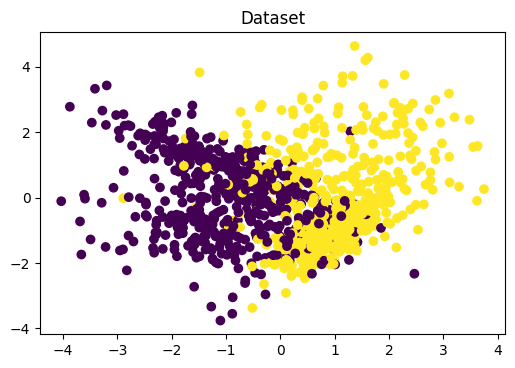

In [10]:
X, y = make_classification(n_features=2,
						   n_redundant=0,
						   n_informative=2,
						   random_state=1,
						   n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=12)

plt.rcParams['figure.dpi'] = 100
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.title('Dataset')
plt.show()

# PR curve and ROC

## Train classifier

In [11]:
classifier = KNeighborsClassifier(10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

## Get Precision, Recall, TPR and FPR

In [12]:
from PR import PR
from ROC import ROC

predictions = classifier.predict_proba(X_test)[:, 1]
# Self-made PR and ROC
Precision, Recall = PR(predictions, y_test)
fpr, tpr = ROC(predictions, y_test)
# Sklearn functions
lib_prs, lib_rec, _ = precision_recall_curve(y_test, predictions)
lib_pr_auc = auc(lib_rec, lib_prs)
lib_fpr, lib_tpr, _ = roc_curve(y_test, predictions)
lib_roc_auc = auc(lib_fpr, lib_tpr)

## Let's plot

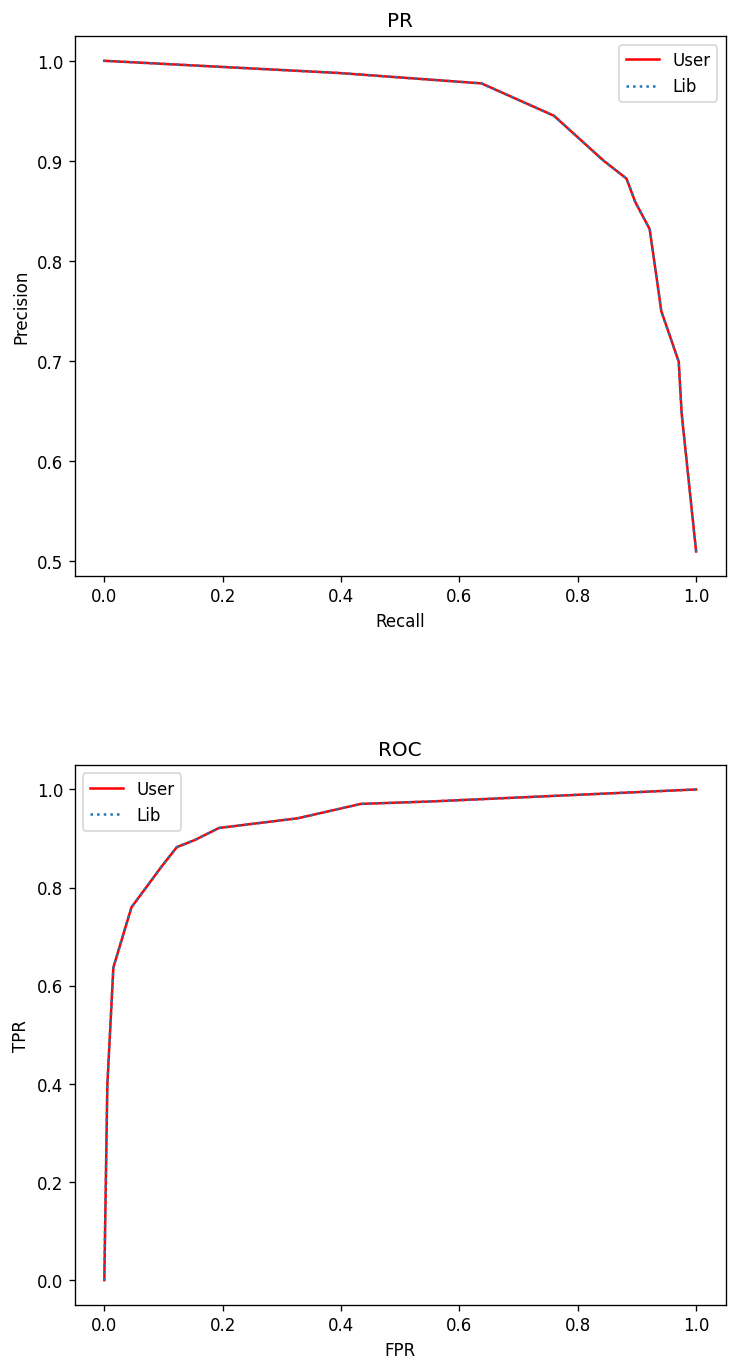

PR AUC = 0.9481771983819669
ROC AUC = 0.9385504201680673
PR AUC absolute difference = 0.0
ROC AUC absolute difference = 1.1102230246251565e-16


In [15]:
plt.figure(figsize=(7, 14), dpi=120)
# PR
plt.subplot(211)
plt.title('PR')
plt.plot(Recall, Precision, label='User', color='r')
plt.plot(lib_rec, lib_prs, ':', label='Lib')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
# ROC
plt.subplot(212)
plt.title('ROC')
plt.plot(fpr, tpr, label='User', color='r')
plt.plot(lib_fpr, lib_tpr,':', label='Lib')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.subplots_adjust(hspace=.35)
plt.show()
# AUC
print('PR AUC = ' + str(np.abs(np.trapz(Precision, Recall))))
print('ROC AUC = ' + str(np.abs(np.trapz(tpr, fpr))))
print('PR AUC absolute difference = ' + str(np.abs(lib_pr_auc - np.abs(np.trapz(Precision, Recall)))))
print('ROC AUC absolute difference = ' + str(np.abs(lib_roc_auc - np.abs(np.trapz(tpr, fpr)))))